# Предобработка данных

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.linear_model import RidgeClassifier
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, ConfusionMatrixDisplay
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [27]:
about_df = pd.read_csv('C:/Users/Mary/Desktop/Диплом/MER_audio_taffc_dataset/panda_dataset_taffc_metadata.csv')

In [29]:
about_df.head()

,Song,Artist,Title,Quadrant,PQuad,MoodsTotal,Moods,MoodsFoundStr,MoodsStr,MoodsStrSplit,Genres,GenresStr,Sample,SampleURL
0,MT0000004637,Charlie Poole,Bulldog Down in Sunny Tennessee,Q3,0.666667,3,3,circular; greasy; messy,Circular; Greasy; Messy,Circular; Greasy; Messy,2,Country; International,1,http://rovimusic.rovicorp.com/playback.mp3?c=l...
1,MT0000011357,Dismember,Reborn in Blasphemy,Q2,0.666667,3,3,jittery; negative; nervous,Negative; Nervous/Jittery,Negative; Nervous; Jittery,3,Electronic; International; Pop/Rock,1,http://rovimusic.rovicorp.com/playback.mp3?c=0...
2,MT0000011975,Curse of the Golden Vampire,Ultrasonic Meltdown,Q2,0.666667,6,5,fierce; harsh; hostile; menacing; outrageous,Fierce; Harsh; Hostile; Menacing; Outrageous; ...,Fierce; Harsh; Hostile; Menacing; Outrageous; ...,1,Electronic,1,http://rovimusic.rovicorp.com/playback.mp3?c=_...
3,MT0000040632,Gipsy Kings,Flamencos en el Aire,Q1,0.750000,4,3,fiery; sexy; spicy,Cathartic; Fiery; Sexy; Spicy,Cathartic; Fiery; Sexy; Spicy,2,International; Jazz,1,http://rovimusic.rovicorp.com/playback.mp3?c=G...
4,MT0000044741,Little Walter,Last Night,Q3,0.750000,4,4,greasy; gritty; gutsy; lazy,Greasy; Gritty; Gutsy; Lazy,Greasy; Gritty; Gutsy; Lazy,1,Blues,1,http://rovimusic.rovicorp.com/playback.mp3?c=k...


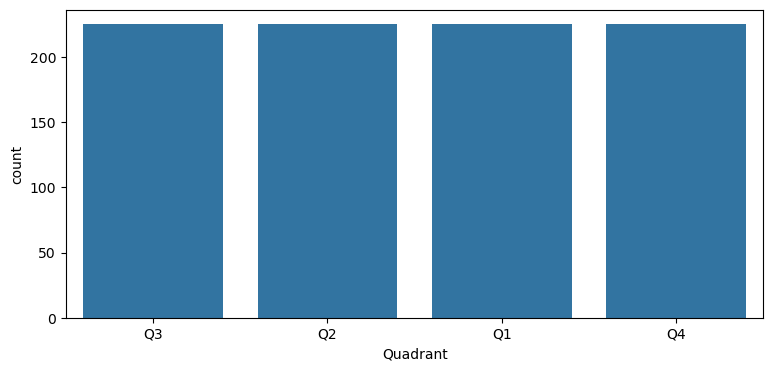

In [38]:
plt.figure(figsize=(9,4))
sns.countplot(x=about_df['Quadrant'])  # Использование вертикальной оси для категорий
plt.show()

<Axes: xlabel='Moods', ylabel='Count'>

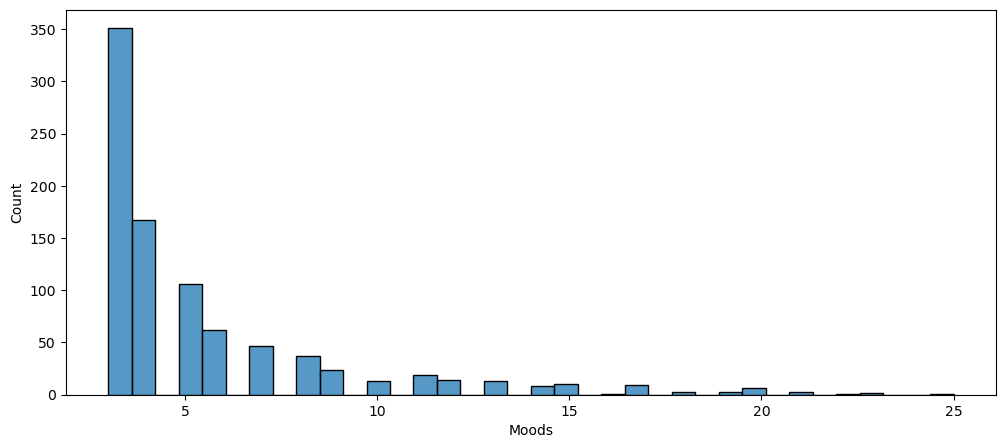

In [40]:
plt.figure(figsize=(12,5))
sns.histplot(about_df['Moods'])

In [52]:
about_df.groupby('Quadrant')['MoodsFoundStr'].unique().reset_index()

,Quadrant,MoodsFoundStr
0,Q1,"[fiery; sexy; spicy, cheerful; fun; happy; joy..."
1,Q2,"[jittery; negative; nervous, fierce; harsh; ho..."
2,Q3,"[circular; greasy; messy, greasy; gritty; guts..."
3,Q4,[bright; elegant; joyous; light; precious; ref...


In [5]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

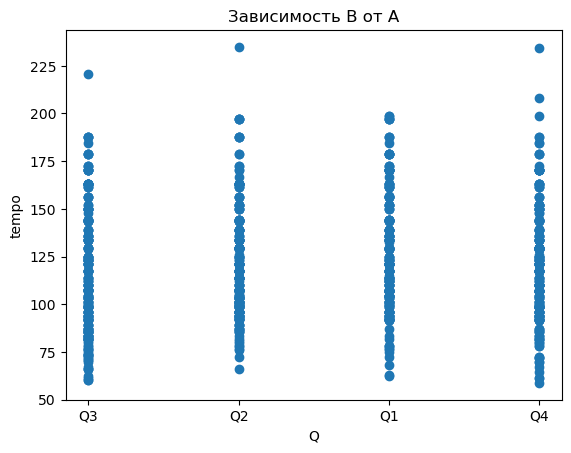

In [96]:
plt.scatter(final_df['Quadrant'], final_df.iloc[:, -1])
plt.xlabel('Q')  # Подпись для оси X
plt.ylabel('tempo')  # Подпись для оси Y
plt.title('Зависимость B от A')  # Заголовок графика
plt.show()

In [127]:
df.iloc[:, 0]

0        0
1        1
2        2
3        3
4        4
      ... 
895    895
896    896
897    897
898    898
899    899
Name: Unnamed: 0, Length: 900, dtype: int64

In [13]:
df.iloc[:, 338]

0        0
1        1
2        2
3        3
4        4
      ... 
895    895
896    896
897    897
898    898
899    899
Name: 336, Length: 900, dtype: int64

In [143]:
df.iloc[:, 467]

0        0
1        1
2        2
3        3
4        4
      ... 
895    895
896    896
897    897
898    898
899    899
Name: 465, Length: 900, dtype: int64

In [15]:
df = df.drop(df.columns[[0, 338, 467]], axis=1)

In [ ]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

In [9]:
df = df.drop(df.columns[[0]], axis=1)

In [47]:
df.head()

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178
2,Q2,0.310428,0.328462,0.413456,0.555491,0.530212,0.436717,0.347030,0.308844,0.339200,...,-2.085293,-2.503842,-4.341682,-2.598336,-3.895138,-0.943562,-4.858965,0.452470,-4.311635,101.351351
3,Q1,0.159420,0.161369,0.177484,0.220572,0.341637,0.407468,0.316527,0.190813,0.155512,...,1.663398,-3.054370,-3.469282,0.551196,-2.130995,1.955830,-1.407931,4.732381,-2.828623,98.684211
4,Q3,0.311646,0.319286,0.308918,0.314276,0.316000,0.288682,0.250883,0.219238,0.244121,...,-2.719656,-4.388300,0.210486,0.959180,-0.584419,3.384225,-4.916590,1.795105,-4.837695,66.964286


In [13]:
final_df = df

# Обучение моделей

In [15]:
X = final_df.drop('Quadrant',axis=1)
y = final_df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [17]:
scaler = StandardScaler()
scal_X_train = scaler.fit_transform(X_train)
scal_X_test = scaler.transform(X_test)

In [211]:
# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-09 16:09:10,525] A new study created in memory with name: no-name-aa36d959-3ec4-46cf-a09d-f0eb735c2b20
[I 2025-04-09 16:09:46,354] Trial 0 finished with value: 0.5594771241830065 and parameters: {'n_estimators': 168, 'max_depth': 4, 'min_samples_split': 0.10269144974839821, 'min_samples_leaf': 2, 'max_features': 0.2021024352759881, 'bootstrap': False}. Best is trial 0 with value: 0.5594771241830065.
[I 2025-04-09 16:10:30,472] Trial 4 finished with value: 0.465359477124183 and parameters: {'n_estimators': 162, 'max_depth': 44, 'min_samples_split': 0.46374043554190786, 'min_samples_leaf': 11, 'max_features': 0.8183959131498855, 'bootstrap': False}. Best is trial 0 with value: 0.5594771241830065.
[I 2025-04-09 16:10:40,155] Trial 1 finished with value: 0.47058823529411764 and parameters: {'n_estimators': 497, 'max_depth': 14, 'min_samples_split': 0.3985039960799834, 'min_samples_leaf': 7, 'max_features': 0.7617850672457549, 'bootstrap': True}. Best is trial 0 with value: 0.559

Лучшие параметры: {'n_estimators': 339, 'max_depth': 28, 'min_samples_split': 0.17061651654335866, 'min_samples_leaf': 10, 'max_features': 0.5712135173396538, 'bootstrap': True}
Лучший результат: 0.5973856209150327


In [213]:
optuna_rfc = RandomForestClassifier(n_estimators=387, max_depth=10, min_samples_split=0.010245918919697478, min_samples_leaf=13, max_features=0.20246386097397454, bootstrap=False)
optuna_rfc.fit(X_train,y_train)
optuna_rfc_preds = optuna_rfc.predict(X_test)

In [219]:
print(classification_report(y_test,optuna_rfc_preds))

              precision    recall  f1-score   support

          Q1       0.68      0.66      0.67        41
          Q2       0.75      0.82      0.79        40
          Q3       0.70      0.68      0.69        28
          Q4       0.67      0.62      0.64        26

    accuracy                           0.70       135
   macro avg       0.70      0.69      0.70       135
weighted avg       0.70      0.70      0.70       135



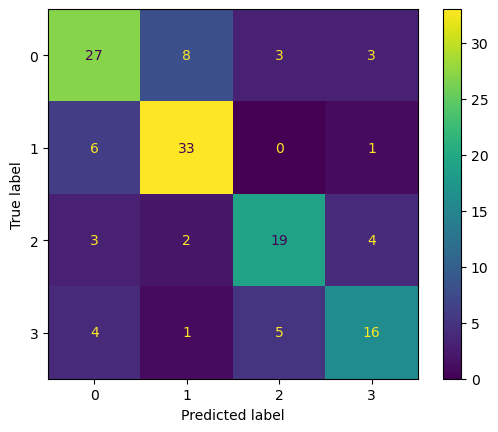

In [221]:
ConfusionMatrixDisplay(confusion_matrix(y_test,optuna_rfc_preds)).plot()

In [30]:
#pip install xgboost

In [229]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры для XGBoost
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)  # Скорость обучения
    gamma = trial.suggest_float("gamma", 0, 1)  # Параметр, влияющий на регуляризацию
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)  # Мин. вес объекта для узла
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Доля выборки для обучения
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # Доля признаков для каждого дерева

    # Определяем модель
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-09 17:09:23,676] A new study created in memory with name: no-name-fa8ea528-3e4d-4334-a95c-b2cd3279e5b2
[I 2025-04-09 17:11:42,473] Trial 2 finished with value: 0.5725490196078431 and parameters: {'n_estimators': 351, 'max_depth': 37, 'learning_rate': 0.08716888368326137, 'gamma': 0.21849608121481112, 'min_child_weight': 5, 'subsample': 0.9392261130391615, 'colsample_bytree': 0.9386560492262137}. Best is trial 2 with value: 0.5725490196078431.
[I 2025-04-09 17:12:03,797] Trial 1 finished with value: 0.588235294117647 and parameters: {'n_estimators': 411, 'max_depth': 12, 'learning_rate': 0.045300498780904294, 'gamma': 0.8843120666440323, 'min_child_weight': 9, 'subsample': 0.678276241725474, 'colsample_bytree': 0.7714750540602625}. Best is trial 1 with value: 0.588235294117647.
[I 2025-04-09 17:13:42,229] Trial 4 finished with value: 0.584313725490196 and parameters: {'n_estimators': 151, 'max_depth': 27, 'learning_rate': 0.09575345228060675, 'gamma': 0.37534796537563053, 'mi

Лучшие параметры: {'n_estimators': 216, 'max_depth': 42, 'learning_rate': 0.043908313541573846, 'gamma': 0.5678188169281355, 'min_child_weight': 5, 'subsample': 0.5269890198878265, 'colsample_bytree': 0.8643090537498231}
Лучший результат: 0.6091503267973857


In [37]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()

# Преобразуем y_train и y_test
y_train_encoded = encoder.fit_transform(y_train)  # Кодируем метки для тренировки
y_test_encoded = encoder.transform(y_test)  # Кодируем метки для теста

optuna_xgb = XGBClassifier(n_estimators=216, max_depth=42, learning_rate=0.043908313541573846, gamma=0.5678188169281355, min_child_weight=5, subsample=0.5269890198878265, colsample_bytree=0.8643090537498231)
optuna_xgb.fit(X_train,y_train_encoded)
optuna_xgb_preds = optuna_xgb.predict(X_test)

In [41]:
print(classification_report(y_test_encoded,optuna_xgb_preds))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68        41
           1       0.75      0.82      0.79        40
           2       0.75      0.75      0.75        28
           3       0.67      0.62      0.64        26

    accuracy                           0.72       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.72      0.72      0.72       135



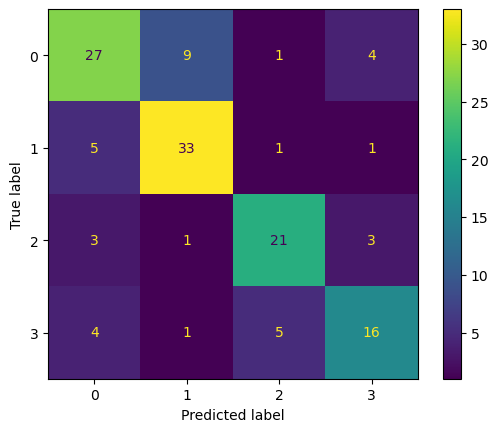

In [45]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,optuna_xgb_preds)).plot()

In [53]:
final_df

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178
2,Q2,0.310428,0.328462,0.413456,0.555491,0.530212,0.436717,0.347030,0.308844,0.339200,...,-2.085293,-2.503842,-4.341682,-2.598336,-3.895138,-0.943562,-4.858965,0.452470,-4.311635,101.351351
3,Q1,0.159420,0.161369,0.177484,0.220572,0.341637,0.407468,0.316527,0.190813,0.155512,...,1.663398,-3.054370,-3.469282,0.551196,-2.130995,1.955830,-1.407931,4.732381,-2.828623,98.684211
4,Q3,0.311646,0.319286,0.308918,0.314276,0.316000,0.288682,0.250883,0.219238,0.244121,...,-2.719656,-4.388300,0.210486,0.959180,-0.584419,3.384225,-4.916590,1.795105,-4.837695,66.964286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Q2,0.447475,0.448676,0.438479,0.439512,0.485013,0.506198,0.478581,0.436172,0.414770,...,1.297553,-4.574359,-2.083792,-4.426960,-3.580336,-0.437528,-5.041879,2.266136,-8.072866,107.666016
896,Q2,0.401390,0.391887,0.464544,0.463246,0.501234,0.543443,0.537970,0.510510,0.426954,...,3.217964,-3.361683,0.015203,-1.690568,-1.166362,0.061220,-5.693520,1.429244,-4.060403,92.285156
897,Q2,0.361099,0.353167,0.366254,0.381352,0.385411,0.384029,0.378387,0.358803,0.369454,...,-2.440423,-3.723344,-2.989859,-0.241056,-2.055440,-0.082782,-4.746728,-0.980434,-4.079439,163.043478
898,Q1,0.225305,0.201042,0.208932,0.274350,0.316522,0.316821,0.354430,0.290584,0.306562,...,1.338773,-3.451742,-3.442450,-0.442456,-1.340150,2.674443,-3.844032,0.393816,-5.733059,120.967742


In [55]:
final_df.to_csv(r'C:\Users\Mary\Desktop\Диплом\506_columns_df.csv')

# CatBoost

In [71]:
df = pd.read_csv("C:/Users/Mary/Desktop/Диплом/final_df.csv")

In [73]:
df = df.drop(df.columns[[0]], axis=1)

In [75]:
df.head()

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178
2,Q2,0.310428,0.328462,0.413456,0.555491,0.530212,0.436717,0.347030,0.308844,0.339200,...,-2.085293,-2.503842,-4.341682,-2.598336,-3.895138,-0.943562,-4.858965,0.452470,-4.311635,101.351351
3,Q1,0.159420,0.161369,0.177484,0.220572,0.341637,0.407468,0.316527,0.190813,0.155512,...,1.663398,-3.054370,-3.469282,0.551196,-2.130995,1.955830,-1.407931,4.732381,-2.828623,98.684211
4,Q3,0.311646,0.319286,0.308918,0.314276,0.316000,0.288682,0.250883,0.219238,0.244121,...,-2.719656,-4.388300,0.210486,0.959180,-0.584419,3.384225,-4.916590,1.795105,-4.837695,66.964286


In [77]:
final_df = df

In [97]:
X = final_df.drop('Quadrant',axis=1)
y = final_df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [15]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры с более узкими диапазонами
    iterations = trial.suggest_int("iterations", 50, 300)  # Сокращение диапазона
    depth = trial.suggest_int("depth", 4, 8)  # Меньший диапазон для глубины
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)  # Более узкий диапазон
    l2_leaf_reg = trial.suggest_loguniform("l2_leaf_reg", 1e-3, 1e2)  # Более узкий диапазон для L2-регуляризации
    model_size_reg = trial.suggest_loguniform("model_size_reg", 1e-3, 1e2)  # Более узкий диапазон для регуляризации модели
    bagging_temperature = trial.suggest_uniform("bagging_temperature", 0, 0.7)  # Меньший диапазон для бэггинга
    random_strength = trial.suggest_uniform("random_strength", 0, 0.5)  # Меньший диапазон для случайности
    border_count = trial.suggest_int("border_count", 32, 150)  # Меньший диапазон для границ
    grow_policy = trial.suggest_categorical("grow_policy", ["SymmetricTree", "Lossguide"])  # Уменьшаем выбор стратегий роста

    # Определяем модель
    model = CatBoostClassifier(
        iterations=iterations,
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        model_size_reg=model_size_reg,
        bagging_temperature=bagging_temperature,
        random_strength=random_strength,
        border_count=border_count,
        grow_policy=grow_policy,
        verbose=0,  # Отключаем вывод в процессе обучения
        random_state=42
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Меньше фолдов для ускорения
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()

    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=50, n_jobs=-1)  # Уменьшаем количество итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-18 02:27:23,085] A new study created in memory with name: no-name-93e10b3b-a8c7-4a52-b6e4-bbd5feebedb2
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\761932541.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)  # Более узкий диапазон
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\761932541.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg = trial.suggest_loguniform("l2_leaf_reg", 1e-3, 1e2)  # Более узкий диапазон для L2-регуляризации
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\761932541.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

Лучшие параметры: {'iterations': 134, 'depth': 6, 'learning_rate': 0.0009811281757588666, 'l2_leaf_reg': 74.67243447223989, 'model_size_reg': 0.0019654525382756163, 'bagging_temperature': 0.5630528252972483, 'random_strength': 0.25841450477094086, 'border_count': 150, 'grow_policy': 'Lossguide'}
Лучший результат: 0.5882352941176471


In [17]:
optuna_cbc = CatBoostClassifier(n_estimators=134, max_depth=6, learning_rate=0.0009811281757588666, l2_leaf_reg=74.67243447223989, model_size_reg=0.0019654525382756163, bagging_temperature=0.5630528252972483, random_strength=0.25841450477094086, border_count=150, grow_policy='Lossguide')
optuna_cbc.fit(X_train,y_train)
optuna_cbc_preds = optuna_cbc.predict(X_test)

0:	learn: 1.3861795	total: 164ms	remaining: 21.8s
1:	learn: 1.3860592	total: 274ms	remaining: 18.1s
2:	learn: 1.3859323	total: 396ms	remaining: 17.3s
3:	learn: 1.3858095	total: 508ms	remaining: 16.5s
4:	learn: 1.3856975	total: 612ms	remaining: 15.8s
5:	learn: 1.3855871	total: 721ms	remaining: 15.4s
6:	learn: 1.3854695	total: 852ms	remaining: 15.5s
7:	learn: 1.3853399	total: 979ms	remaining: 15.4s
8:	learn: 1.3852495	total: 1.09s	remaining: 15.1s
9:	learn: 1.3851028	total: 1.2s	remaining: 14.8s
10:	learn: 1.3849747	total: 1.32s	remaining: 14.8s
11:	learn: 1.3848538	total: 1.45s	remaining: 14.7s
12:	learn: 1.3847285	total: 1.56s	remaining: 14.5s
13:	learn: 1.3845687	total: 1.67s	remaining: 14.3s
14:	learn: 1.3844779	total: 1.78s	remaining: 14.1s
15:	learn: 1.3843835	total: 1.9s	remaining: 14s
16:	learn: 1.3842207	total: 2.02s	remaining: 13.9s
17:	learn: 1.3840799	total: 2.12s	remaining: 13.7s
18:	learn: 1.3839697	total: 2.22s	remaining: 13.5s
19:	learn: 1.3838625	total: 2.34s	remaining: 

In [19]:
print(classification_report(y_test,optuna_cbc_preds))

              precision    recall  f1-score   support

          Q1       0.57      0.61      0.59        41
          Q2       0.69      0.72      0.71        40
          Q3       0.62      0.54      0.58        28
          Q4       0.56      0.54      0.55        26

    accuracy                           0.61       135
   macro avg       0.61      0.60      0.61       135
weighted avg       0.61      0.61      0.61       135



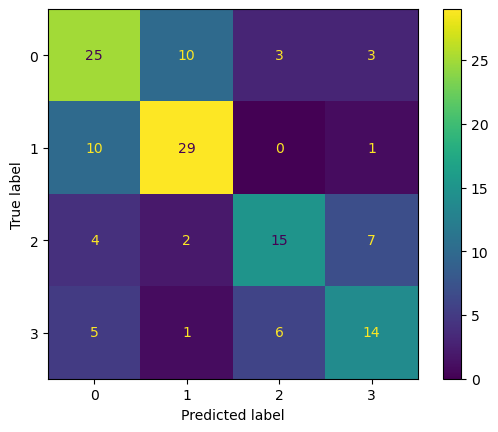

In [21]:
ConfusionMatrixDisplay(confusion_matrix(y_test,optuna_cbc_preds)).plot()

# Ridge Classifier

In [50]:
import optuna
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Преобразуем метки в числовые значения
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры для RidgeClassifier
    alpha = trial.suggest_loguniform("alpha", 1e-6, 1e3)  # Параметр регуляризации
    solver = trial.suggest_categorical("solver", ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "saga"])  # Алгоритм решения
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])  # Нужно ли учитывать сдвиг

    # Определяем модель
    model = RidgeClassifier(
        alpha=alpha,
        solver=solver,
        fit_intercept=fit_intercept
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-28 17:56:58,208] A new study created in memory with name: no-name-67b3667e-72ca-44e1-9a92-fa15a81f363d
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\43389497.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e3)  # Параметр регуляризации
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\43389497.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform("alpha", 1e-6, 1e3)  # Параметр регуляризации
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\43389497.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://gi

Лучшие параметры: {'alpha': 4.505157668245234, 'solver': 'cholesky', 'fit_intercept': True}
Лучший результат: 0.538562091503268


In [54]:
optuna_rc = RidgeClassifier(alpha=4.505157668245234, solver ='cholesky', fit_intercept=True)
optuna_rc.fit(X_train,y_train)
optuna_rc_preds = optuna_rc.predict(X_test)

In [56]:
print(classification_report(y_test,optuna_rc_preds))

              precision    recall  f1-score   support

          Q1       0.71      0.54      0.61        41
          Q2       0.66      0.82      0.73        40
          Q3       0.59      0.57      0.58        28
          Q4       0.67      0.69      0.68        26

    accuracy                           0.66       135
   macro avg       0.66      0.66      0.65       135
weighted avg       0.66      0.66      0.65       135



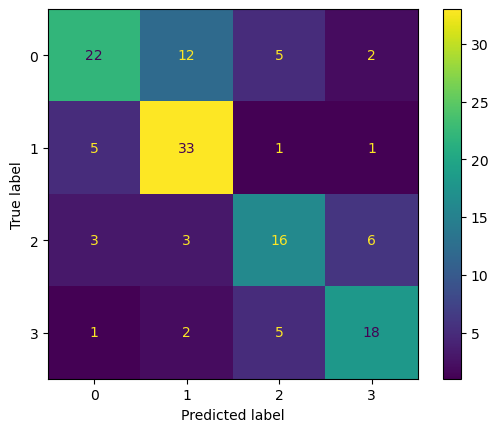

In [58]:
ConfusionMatrixDisplay(confusion_matrix(y_test,optuna_rc_preds)).plot()

# Ансамбль

In [99]:
optuna_rfc = RandomForestClassifier(n_estimators=387, max_depth=10, min_samples_split=0.010245918919697478, min_samples_leaf=13, max_features=0.20246386097397454, bootstrap=False)
optuna_rfc.fit(X_train,y_train_encoded)
optuna_rfc_preds = optuna_rfc.predict(X_test)

In [101]:
print(classification_report(y_test_encoded,optuna_rfc_preds))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.74      0.80      0.77        40
           2       0.72      0.64      0.68        28
           3       0.67      0.69      0.68        26

    accuracy                           0.70       135
   macro avg       0.70      0.69      0.69       135
weighted avg       0.70      0.70      0.70       135



In [101]:
print(classification_report(y_test_encoded,optuna_rfc_preds))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.74      0.80      0.77        40
           2       0.66      0.68      0.67        28
           3       0.65      0.58      0.61        26

    accuracy                           0.68       135
   macro avg       0.68      0.67      0.67       135
weighted avg       0.68      0.68      0.68       135



In [103]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()

# Преобразуем y_train и y_test
y_train_encoded = encoder.fit_transform(y_train)  # Кодируем метки для тренировки
y_test_encoded = encoder.transform(y_test)  # Кодируем метки для теста

optuna_xgb = XGBClassifier(n_estimators=216, max_depth=42, learning_rate=0.043908313541573846, gamma=0.5678188169281355, min_child_weight=5, subsample=0.5269890198878265, colsample_bytree=0.8643090537498231)
optuna_xgb.fit(X_train,y_train_encoded)
optuna_xgb_preds = optuna_xgb.predict(X_test)

In [105]:
print(classification_report(y_test_encoded,optuna_xgb_preds))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68        41
           1       0.75      0.82      0.79        40
           2       0.75      0.75      0.75        28
           3       0.67      0.62      0.64        26

    accuracy                           0.72       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.72      0.72      0.72       135



In [57]:
print(classification_report(y_test_encoded,optuna_xgb_preds))

              precision    recall  f1-score   support

           0       0.69      0.66      0.68        41
           1       0.75      0.82      0.79        40
           2       0.75      0.75      0.75        28
           3       0.67      0.62      0.64        26

    accuracy                           0.72       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.72      0.72      0.72       135



In [107]:
# Кодируем целевую переменную, если это не было сделано ранее
encoder = LabelEncoder()

# Преобразуем y_train и y_test в числовые значения
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

optuna_rc = RidgeClassifier(alpha=4.505157668245234, solver ='cholesky', fit_intercept=True)
optuna_rc.fit(X_train,y_train_encoded)
optuna_rc_preds = optuna_rc.predict(X_test)

In [109]:
print(classification_report(y_test_encoded,optuna_rc_preds))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61        41
           1       0.66      0.82      0.73        40
           2       0.59      0.57      0.58        28
           3       0.67      0.69      0.68        26

    accuracy                           0.66       135
   macro avg       0.66      0.66      0.65       135
weighted avg       0.66      0.66      0.65       135



In [111]:
optuna_cbc = CatBoostClassifier(n_estimators=134, max_depth=6, learning_rate=0.0009811281757588666, l2_leaf_reg=74.67243447223989, model_size_reg=0.0019654525382756163, bagging_temperature=0.5630528252972483, random_strength=0.25841450477094086, border_count=150, grow_policy='Lossguide')
optuna_cbc.fit(X_train,y_train_encoded)
optuna_cbc_preds = optuna_cbc.predict(X_test)

0:	learn: 1.3861795	total: 184ms	remaining: 24.4s
1:	learn: 1.3860592	total: 335ms	remaining: 22.1s
2:	learn: 1.3859323	total: 522ms	remaining: 22.8s
3:	learn: 1.3858095	total: 687ms	remaining: 22.3s
4:	learn: 1.3856975	total: 845ms	remaining: 21.8s
5:	learn: 1.3855871	total: 986ms	remaining: 21s
6:	learn: 1.3854695	total: 1.14s	remaining: 20.7s
7:	learn: 1.3853399	total: 1.29s	remaining: 20.4s
8:	learn: 1.3852495	total: 1.45s	remaining: 20.1s
9:	learn: 1.3851028	total: 1.59s	remaining: 19.7s
10:	learn: 1.3849747	total: 1.77s	remaining: 19.8s
11:	learn: 1.3848538	total: 1.93s	remaining: 19.6s
12:	learn: 1.3847285	total: 2.08s	remaining: 19.3s
13:	learn: 1.3845687	total: 2.22s	remaining: 19s
14:	learn: 1.3844779	total: 2.39s	remaining: 18.9s
15:	learn: 1.3843835	total: 2.55s	remaining: 18.8s
16:	learn: 1.3842207	total: 2.73s	remaining: 18.8s
17:	learn: 1.3840799	total: 2.89s	remaining: 18.6s
18:	learn: 1.3839697	total: 3.05s	remaining: 18.5s
19:	learn: 1.3838625	total: 3.23s	remaining: 

In [115]:
print(classification_report(y_test_encoded,optuna_cbc_preds))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        41
           1       0.69      0.72      0.71        40
           2       0.62      0.54      0.58        28
           3       0.56      0.54      0.55        26

    accuracy                           0.61       135
   macro avg       0.61      0.60      0.61       135
weighted avg       0.61      0.61      0.61       135



## RFC + XGB = LogisticRegression

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Получение предсказаний всех базовых моделей
base_predictions = np.column_stack([
    optuna_rfc_preds,
    optuna_xgb_preds,
])

# Разделим данные на train и test для мета-модели
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(base_predictions, y_test_encoded, test_size=0.3, random_state=42)

# Мета-модель — используем логистическую регрессию, но можно попробовать и другие классификаторы
meta_model = LogisticRegression()

# Обучение мета-модели
meta_model.fit(X_train_meta, y_train_meta)

# Получаем предсказания мета-модели
stacked_preds = meta_model.predict(X_test_meta)

# Оценка качества
accuracy = accuracy_score(y_test_meta, stacked_preds)
print(f'Accuracy of stacked model: {accuracy}')


Accuracy of stacked model: 0.7560975609756098


In [302]:
print(classification_report(y_test_meta,stacked_preds))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.81      1.00      0.90        13
           2       0.86      0.75      0.80         8
           3       0.67      0.67      0.67         9

    accuracy                           0.76        41
   macro avg       0.75      0.74      0.74        41
weighted avg       0.75      0.76      0.75        41



## RFC + XGB = CatBoostClassifier

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# Получение предсказаний всех базовых моделей
base_predictions = np.column_stack([
    optuna_rfc_preds,
    optuna_xgb_preds,
])

# Разделим данные на train и test для мета-модели
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(base_predictions, y_test_encoded, test_size=0.3, random_state=42)

# Мета-модель — используем логистическую регрессию, но можно попробовать и другие классификаторы
meta_model = CatBoostClassifier()

# Обучение мета-модели
meta_model.fit(X_train_meta, y_train_meta)

# Получаем предсказания мета-модели
stacked_preds = meta_model.predict(X_test_meta)

# Оценка качества
accuracy = accuracy_score(y_test_meta, stacked_preds)
print(f'Accuracy of stacked model: {accuracy}')


Learning rate set to 0.070138
0:	learn: 1.3448750	total: 1.96ms	remaining: 1.96s
1:	learn: 1.2970311	total: 2.79ms	remaining: 1.39s
2:	learn: 1.2566359	total: 3.93ms	remaining: 1.31s
3:	learn: 1.2286320	total: 4.32ms	remaining: 1.08s
4:	learn: 1.2048445	total: 5.16ms	remaining: 1.03s
5:	learn: 1.1693148	total: 6.32ms	remaining: 1.05s
6:	learn: 1.1441823	total: 8.6ms	remaining: 1.22s
7:	learn: 1.1177909	total: 9.58ms	remaining: 1.19s
8:	learn: 1.0929333	total: 10.5ms	remaining: 1.15s
9:	learn: 1.0702411	total: 11.4ms	remaining: 1.12s
10:	learn: 1.0495222	total: 12.1ms	remaining: 1.09s
11:	learn: 1.0403847	total: 12.7ms	remaining: 1.04s
12:	learn: 1.0227177	total: 13.6ms	remaining: 1.03s
13:	learn: 1.0066744	total: 14.7ms	remaining: 1.04s
14:	learn: 0.9911618	total: 15.4ms	remaining: 1.01s
15:	learn: 0.9772752	total: 16.3ms	remaining: 1s
16:	learn: 0.9660536	total: 17.1ms	remaining: 991ms
17:	learn: 0.9574913	total: 17.7ms	remaining: 966ms
18:	learn: 0.9463340	total: 18.7ms	remaining: 96

In [123]:
print(classification_report(y_test_meta,stacked_preds))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.81      1.00      0.90        13
           2       0.75      0.75      0.75         8
           3       0.62      0.56      0.59         9

    accuracy                           0.73        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.72      0.73      0.72        41



## RFC + XGB = DecisionTree

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Получение предсказаний всех базовых моделей
base_predictions = np.column_stack([
    optuna_rfc_preds,
    optuna_xgb_preds,
])

# Разделим данные на train и test для мета-модели
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(base_predictions, y_test_encoded, test_size=0.3, random_state=42)

# Мета-модель — используем логистическую регрессию, но можно попробовать и другие классификаторы
meta_model = DecisionTreeClassifier()

# Обучение мета-модели
meta_model.fit(X_train_meta, y_train_meta)

# Получаем предсказания мета-модели
stacked_preds = meta_model.predict(X_test_meta)

# Оценка качества
accuracy = accuracy_score(y_test_meta, stacked_preds)
print(f'Accuracy of stacked model: {accuracy}')


Accuracy of stacked model: 0.7317073170731707


In [274]:
print(classification_report(y_test_meta,stacked_preds))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.81      1.00      0.90        13
           2       0.75      0.75      0.75         8
           3       0.62      0.56      0.59         9

    accuracy                           0.73        41
   macro avg       0.71      0.71      0.71        41
weighted avg       0.72      0.73      0.72        41



## RFC + XGB = DecisionTree

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Получение предсказаний всех базовых моделей
base_predictions = np.column_stack([
    optuna_rfc_preds,
    optuna_xgb_preds,
])

# Разделим данные на train и test для мета-модели
X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(base_predictions, y_test_encoded, test_size=0.3, random_state=42)

# Мета-модель — используем логистическую регрессию, но можно попробовать и другие классификаторы
meta_model = RandomForestClassifier()

# Обучение мета-модели
meta_model.fit(X_train_meta, y_train_meta)

# Получаем предсказания мета-модели
stacked_preds = meta_model.predict(X_test_meta)

# Оценка качества
accuracy = accuracy_score(y_test_meta, stacked_preds)
print(f'Accuracy of stacked model: {accuracy}')


Accuracy of stacked model: 0.7073170731707317


In [289]:
print(classification_report(y_test_meta,stacked_preds))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.81      1.00      0.90        13
           2       0.67      0.75      0.71         8
           3       0.62      0.56      0.59         9

    accuracy                           0.71        41
   macro avg       0.68      0.69      0.68        41
weighted avg       0.69      0.71      0.69        41



## Optuna

In [165]:
import optuna

# Предполагаем, что base_predictions и y_test_encoded уже получены
X = base_predictions
y = y_test_encoded

def objective(trial):
    # Гиперпараметры для LogisticRegression
    C = trial.suggest_loguniform('C', 1e-4, 10.0)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'

    # Разделение на train/test
    X_train_meta, X_test_meta, y_train_meta, y_test_meta = train_test_split(X, y, test_size=0.3, random_state=42)

    # Обучение модели
    model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
    model.fit(X_train_meta, y_train_meta)

    # Предсказания и метрика
    preds = model.predict(X_test_meta)
    return accuracy_score(y_test_meta, preds)

# Запуск Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f'Best parameters: {study.best_params}')
print(f'Best accuracy: {study.best_value:.4f}')


[I 2025-05-02 19:17:30,365] A new study created in memory with name: no-name-c455fc59-9dc1-4966-bf5d-02a42eb6f2e5
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\767787598.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 10.0)
[I 2025-05-02 19:17:30,392] Trial 0 finished with value: 0.7560975609756098 and parameters: {'C': 1.0292526214829854, 'penalty': 'l1'}. Best is trial 0 with value: 0.7560975609756098.
C:\Users\Mary\AppData\Local\Temp\ipykernel_18996\767787598.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-4, 10.0)
[I 2025-05-02 19:17:30,421] Trial 1 finished with value: 0.7560975

Best parameters: {'C': 0.09359416923243694, 'penalty': 'l2'}
Best accuracy: 0.7805


In [304]:
# Мета-модель — используем логистическую регрессию, но можно попробовать и другие классификаторы
meta_model = LogisticRegression(penalty='l2', C=0.09359416923243694)
# Обучение мета-модели
meta_model.fit(X_train_meta, y_train_meta)
# Получаем предсказания мета-модели
stacked_preds = meta_model.predict(X_test_meta)

In [306]:
print(classification_report(y_test_meta,stacked_preds))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.87      1.00      0.93        13
           2       0.86      0.75      0.80         8
           3       0.67      0.67      0.67         9

    accuracy                           0.78        41
   macro avg       0.77      0.76      0.77        41
weighted avg       0.78      0.78      0.78        41



In [293]:
from sklearn.model_selection import cross_val_score
    
scores = cross_val_score(meta_model, X, y, cv=5, scoring='accuracy')
print(f"Средняя точность по кросс-валидации: {scores.mean():.4f}, {scores.min():.4f}, {scores.max():.4f}")

Средняя точность по кросс-валидации: 0.5933, 0.5444, 0.6333


C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

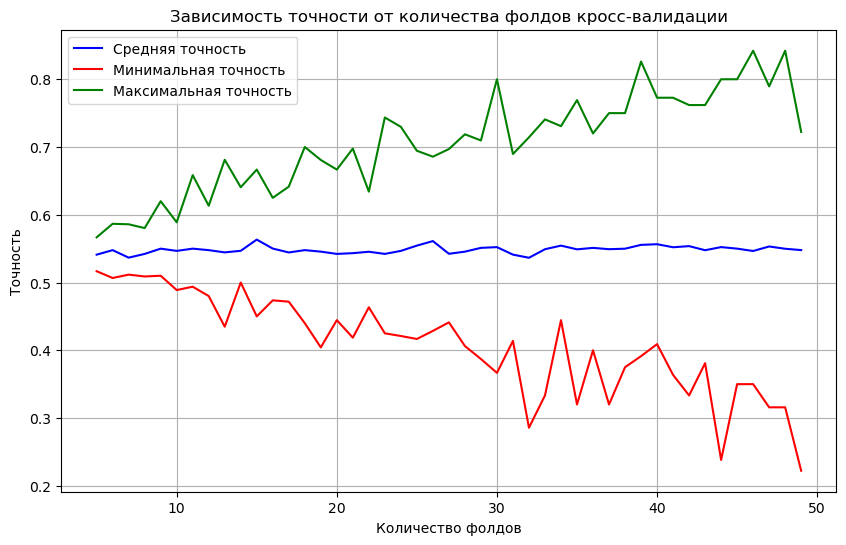

In [262]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Списки для хранения результатов
folds_range = []
mean_scores = []
min_scores = []
max_scores = []

# Цикл по диапазону фолдов
for i in range(5, 50):
    # Кросс-валидация
    scores = cross_val_score(meta_model, X, y, cv=i, scoring='accuracy')
    
    # Добавление результатов в списки
    folds_range.append(i)
    mean_scores.append(scores.mean())
    min_scores.append(scores.min())
    max_scores.append(scores.max())

# Построение графика
plt.figure(figsize=(10, 6))

# Графики для средней, минимальной и максимальной точности
plt.plot(folds_range, mean_scores, label='Средняя точность', color='b')
plt.plot(folds_range, min_scores, label='Минимальная точность', color='r')
plt.plot(folds_range, max_scores, label='Максимальная точность', color='g')

# Подписи и легенда
plt.title('Зависимость точности от количества фолдов кросс-валидации')
plt.xlabel('Количество фолдов')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# Показать график
plt.show()


In [265]:
# Кодируем целевую переменную, если это не было сделано ранее
encoder = LabelEncoder()

# Преобразуем y_train и y_test в числовые значения
y_encoded = encoder.fit_transform(y)

rfc_scores = cross_val_score(optuna_rfc, X, y_encoded, cv=30, scoring='accuracy')
xgb_scores = cross_val_score(optuna_xgb, X, y_encoded, cv=30, scoring='accuracy')
meta_scores = cross_val_score(meta_model, X, y_encoded, cv=30, scoring='accuracy')

print(f"RFC mean accuracy: {rfc_scores.mean():.4f}, min: {rfc_scores.min():.4f}, max: {rfc_scores.max():.4f}")
print(f"XGB mean accuracy: {xgb_scores.mean():.4f}, min: {xgb_scores.min():.4f}, max: {xgb_scores.max():.4f}")
print(f"meta mean accuracy: {meta_scores.mean():.4f}, min: {meta_scores.min():.4f}, max: {meta_scores.max():.4f}")

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

RFC mean accuracy: 0.6111, min: 0.4000, max: 0.7333
XGB mean accuracy: 0.6200, min: 0.4333, max: 0.8000
XGB mean accuracy: 0.5522, min: 0.3667, max: 0.8000


C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# тестирование с понижением размерности

In [312]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [316]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)  
X_pca = pca.fit_transform(X_scaled)

In [326]:
from sklearn.model_selection import cross_val_score
    
scores = cross_val_score(meta_model, X_pca, y, cv=20, scoring='accuracy')
print(f"Средняя точность по кросс-валидации: {scores.mean():.4f}, {scores.min():.4f}, {scores.max():.4f}")

C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Средняя точность по кросс-валидации: 0.5844, 0.4667, 0.7111


C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mary\.conda\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

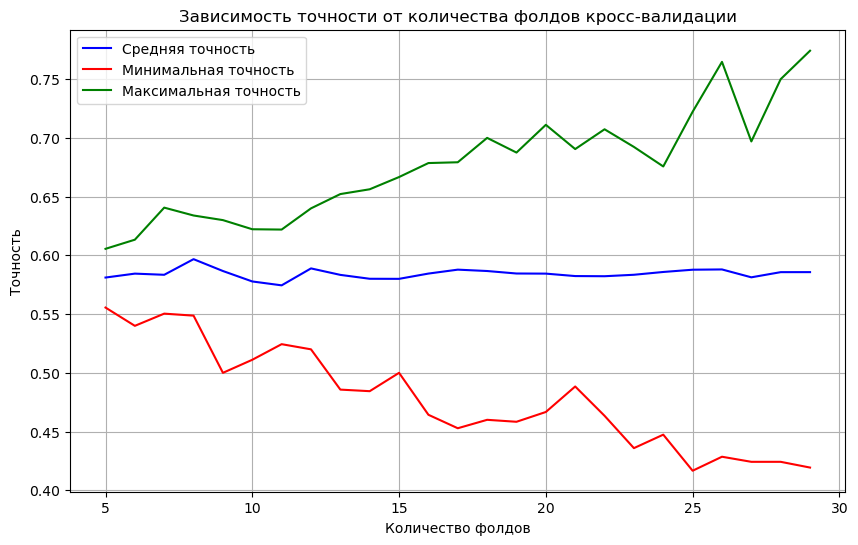

In [328]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Списки для хранения результатов
folds_range = []
mean_scores = []
min_scores = []
max_scores = []

# Цикл по диапазону фолдов
for i in range(5, 30):
    # Кросс-валидация
    scores = cross_val_score(meta_model, X_pca, y, cv=i, scoring='accuracy')
    
    # Добавление результатов в списки
    folds_range.append(i)
    mean_scores.append(scores.mean())
    min_scores.append(scores.min())
    max_scores.append(scores.max())

# Построение графика
plt.figure(figsize=(10, 6))

# Графики для средней, минимальной и максимальной точности
plt.plot(folds_range, mean_scores, label='Средняя точность', color='b')
plt.plot(folds_range, min_scores, label='Минимальная точность', color='r')
plt.plot(folds_range, max_scores, label='Максимальная точность', color='g')

# Подписи и легенда
plt.title('Зависимость точности от количества фолдов кросс-валидации')
plt.xlabel('Количество фолдов')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# Показать график
plt.show()


In [177]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Разделим данные
X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(
    X_train, y_train_encoded, test_size=0.3, random_state=42
)

# 2. Обучим базовые модели
optuna_rfc.fit(X_base_train, y_base_train)
optuna_xgb.fit(X_base_train, y_base_train)

# 3. Получим предсказания базовых моделей
train_preds = np.column_stack([
    optuna_rfc.predict(X_base_train),
    optuna_xgb.predict(X_base_train),
])
test_preds = np.column_stack([
    optuna_rfc.predict(X_base_test),
    optuna_xgb.predict(X_base_test),
])

# 4. Объединение с исходными признаками
X_train_meta = np.hstack([X_base_train, train_preds])
X_test_meta = np.hstack([X_base_test, test_preds])

# 5. Optuna: подбор параметров XGBClassifier
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'random_state': 42
    }

    model = XGBClassifier(**params)
    model.fit(X_train_meta, y_base_train)
    preds = model.predict(X_test_meta)
    return accuracy_score(y_base_test, preds)

# 6. Запуск Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# 7. Финальный результат
print("Best params:", study.best_params)
print(f"Best accuracy: {study.best_value:.4f}")


[I 2025-05-02 19:33:24,162] A new study created in memory with name: no-name-8bcd372f-af23-4f6f-9911-edb738560a73
C:\Users\Mary\.conda\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-02 19:33:27,309] Trial 0 finished with value: 0.5434782608695652 and parameters: {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.2586257571532816, 'gamma': 0.1941273965476925, 'min_child_weight': 2, 'subsample': 0.9448700379221984, 'colsample_bytree': 0.6387346976043471}. Best is trial 0 with value: 0.5434782608695652.
C:\Users\Mary\.conda\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-02 19:33:

Best params: {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.2586257571532816, 'gamma': 0.1941273965476925, 'min_child_weight': 2, 'subsample': 0.9448700379221984, 'colsample_bytree': 0.6387346976043471}
Best accuracy: 0.5435


In [175]:
print(classification_report(y_base_test,stacked_preds))

              precision    recall  f1-score   support

           0       0.48      0.45      0.46        56
           1       0.64      0.67      0.65        54
           2       0.51      0.46      0.48        61
           3       0.54      0.61      0.57        59

    accuracy                           0.54       230
   macro avg       0.54      0.55      0.54       230
weighted avg       0.54      0.54      0.54       230



# Только с хромограммами

In [62]:
final_df.head()

,Quadrant,0,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,503,504,505,506
0,Q3,0.344369,0.267671,0.231999,0.226553,0.236617,0.256444,0.282879,0.309561,0.325702,...,-0.020307,2.324166,3.567792,3.883560,-1.823020,-2.058319,-5.530811,-2.079775,-2.063657,163.043478
1,Q2,0.413149,0.422476,0.382707,0.338075,0.339839,0.332445,0.323744,0.324923,0.316282,...,-1.688632,-3.825361,-0.613288,-3.535904,-4.854705,-1.428813,-8.155371,0.105861,-4.854570,135.999178
2,Q2,0.310428,0.328462,0.413456,0.555491,0.530212,0.436717,0.347030,0.308844,0.339200,...,-2.085293,-2.503842,-4.341682,-2.598336,-3.895138,-0.943562,-4.858965,0.452470,-4.311635,101.351351
3,Q1,0.159420,0.161369,0.177484,0.220572,0.341637,0.407468,0.316527,0.190813,0.155512,...,1.663398,-3.054370,-3.469282,0.551196,-2.130995,1.955830,-1.407931,4.732381,-2.828623,98.684211
4,Q3,0.311646,0.319286,0.308918,0.314276,0.316000,0.288682,0.250883,0.219238,0.244121,...,-2.719656,-4.388300,0.210486,0.959180,-0.584419,3.384225,-4.916590,1.795105,-4.837695,66.964286


In [104]:
X = final_df.iloc[:, 1:338]
y = final_df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [106]:
scaler = StandardScaler()
scal_X_train = scaler.fit_transform(X_train)
scal_X_test = scaler.transform(X_test)

In [108]:
# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    min_samples_split = trial.suggest_float("min_samples_split", 0.01, 0.5)  # Мин. число объектов для разбиения
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)  # Мин. число объектов в листе
    max_features = trial.suggest_float("max_features", 0.1, 1.0)  # Доля признаков для построения каждого дерева
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])  # Использовать бутстрап?

    # Определяем модель
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-10 15:09:22,891] A new study created in memory with name: no-name-2d3c5714-130e-4a7d-b774-f56f778b35a9
[I 2025-04-10 15:10:05,644] Trial 2 finished with value: 0.5437908496732027 and parameters: {'n_estimators': 132, 'max_depth': 13, 'min_samples_split': 0.19338682794199916, 'min_samples_leaf': 20, 'max_features': 0.5943633363769131, 'bootstrap': True}. Best is trial 2 with value: 0.5437908496732027.
[I 2025-04-10 15:10:10,432] Trial 0 finished with value: 0.4601307189542484 and parameters: {'n_estimators': 170, 'max_depth': 44, 'min_samples_split': 0.4401202794963064, 'min_samples_leaf': 3, 'max_features': 0.17675150530175604, 'bootstrap': True}. Best is trial 2 with value: 0.5437908496732027.
[I 2025-04-10 15:10:15,202] Trial 7 finished with value: 0.518954248366013 and parameters: {'n_estimators': 385, 'max_depth': 9, 'min_samples_split': 0.36027129468590474, 'min_samples_leaf': 17, 'max_features': 0.4626310636948906, 'bootstrap': True}. Best is trial 2 with value: 0.5437

Лучшие параметры: {'n_estimators': 499, 'max_depth': 6, 'min_samples_split': 0.011837769220501851, 'min_samples_leaf': 13, 'max_features': 0.3559383545411586, 'bootstrap': True}
Лучший результат: 0.5751633986928104


In [124]:
optuna_rfc_chroma = RandomForestClassifier(n_estimators=499, max_depth=6, min_samples_split=0.011837769220501851, min_samples_leaf=13, max_features=0.3559383545411586, bootstrap=True)
optuna_rfc_chroma.fit(X_train,y_train)
optuna_rfc_chroma_preds = optuna_rfc_chroma.predict(X_test)

In [125]:
print(classification_report(y_test,optuna_rfc_chroma_preds))

              precision    recall  f1-score   support

          Q1       0.59      0.59      0.59        41
          Q2       0.68      0.75      0.71        40
          Q3       0.60      0.64      0.62        28
          Q4       0.55      0.42      0.48        26

    accuracy                           0.61       135
   macro avg       0.60      0.60      0.60       135
weighted avg       0.61      0.61      0.61       135



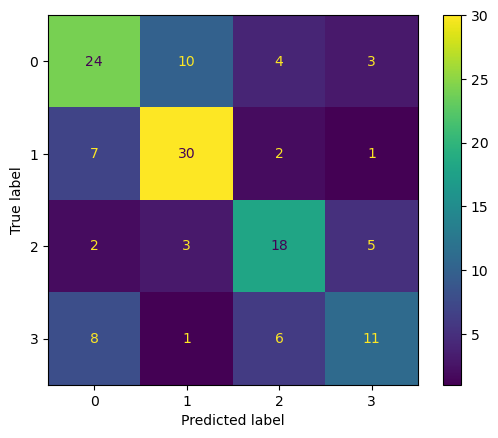

In [126]:
ConfusionMatrixDisplay(confusion_matrix(y_test,optuna_rfc_chroma_preds)).plot()

In [116]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры для XGBoost
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)  # Скорость обучения
    gamma = trial.suggest_float("gamma", 0, 1)  # Параметр, влияющий на регуляризацию
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)  # Мин. вес объекта для узла
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Доля выборки для обучения
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # Доля признаков для каждого дерева

    # Определяем модель
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-10 15:31:22,937] A new study created in memory with name: no-name-45e3891f-76ee-4b4b-a8d3-c4e0563ee9f9
[I 2025-04-10 15:32:07,831] Trial 0 finished with value: 0.5751633986928104 and parameters: {'n_estimators': 443, 'max_depth': 11, 'learning_rate': 0.076485291903866, 'gamma': 0.5971072940252123, 'min_child_weight': 8, 'subsample': 0.7298859709889578, 'colsample_bytree': 0.612872185130207}. Best is trial 0 with value: 0.5751633986928104.
[I 2025-04-10 15:33:03,410] Trial 1 finished with value: 0.5934640522875816 and parameters: {'n_estimators': 187, 'max_depth': 47, 'learning_rate': 0.06057765877219778, 'gamma': 0.1801024517537988, 'min_child_weight': 1, 'subsample': 0.675738629193418, 'colsample_bytree': 0.7313667699526927}. Best is trial 1 with value: 0.5934640522875816.
[I 2025-04-10 15:33:15,245] Trial 3 finished with value: 0.580392156862745 and parameters: {'n_estimators': 67, 'max_depth': 44, 'learning_rate': 0.08659986729100334, 'gamma': 0.9884567607143258, 'min_chi

Лучшие параметры: {'n_estimators': 85, 'max_depth': 6, 'learning_rate': 0.08281238505877674, 'gamma': 0.19194894473938734, 'min_child_weight': 1, 'subsample': 0.9106210945033635, 'colsample_bytree': 0.6987688392498458}
Лучший результат: 0.5947712418300654


In [118]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()

# Преобразуем y_train и y_test
y_train_encoded = encoder.fit_transform(y_train)  # Кодируем метки для тренировки
y_test_encoded = encoder.transform(y_test)  # Кодируем метки для теста

optuna_xgb_chroma = XGBClassifier(n_estimators=85, max_depth=6, learning_rate=0.08281238505877674, gamma=0.19194894473938734, min_child_weight=1, subsample=0.9106210945033635, colsample_bytree=0.6987688392498458)
optuna_xgb_chroma.fit(X_train,y_train_encoded)
optuna_xgb_chroma_preds = optuna_xgb_chroma.predict(X_test)

In [120]:
print(classification_report(y_test_encoded,optuna_xgb_chroma_preds))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.70      0.78      0.74        40
           2       0.57      0.46      0.51        28
           3       0.43      0.50      0.46        26

    accuracy                           0.59       135
   macro avg       0.58      0.58      0.57       135
weighted avg       0.59      0.59      0.59       135



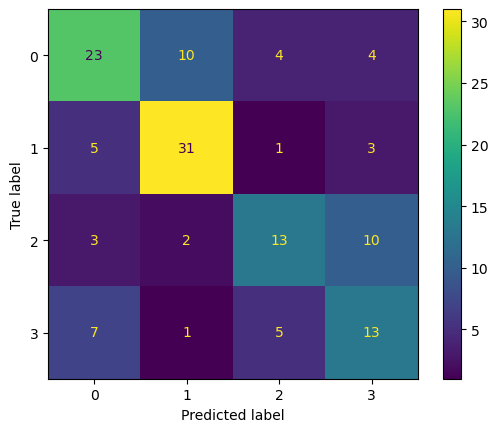

In [122]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,optuna_xgb_chroma_preds)).plot()

# Только с mel

In [131]:
X = final_df.iloc[:, 338:466]
y = final_df['Quadrant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [133]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Оптимизируем гиперпараметры
def objective(trial):
    # Подбираемые параметры для XGBoost
    n_estimators = trial.suggest_int("n_estimators", 50, 500)  # Количество деревьев
    max_depth = trial.suggest_int("max_depth", 2, 50)  # Глубина деревьев
    learning_rate = trial.suggest_float("learning_rate", 0.001, 0.1)  # Скорость обучения
    gamma = trial.suggest_float("gamma", 0, 1)  # Параметр, влияющий на регуляризацию
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)  # Мин. вес объекта для узла
    subsample = trial.suggest_float("subsample", 0.5, 1.0)  # Доля выборки для обучения
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)  # Доля признаков для каждого дерева

    # Определяем модель
    model = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        gamma=gamma,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
        n_jobs=-1  # Параллельный запуск
    )

    # Кросс-валидация (StratifiedKFold для лучшего баланса классов)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train_encoded, cv=skf, scoring="accuracy", n_jobs=-1).mean()
    
    return score  # Оптимизируем точность

# Запускаем Optuna с Pruner (отбрасывание слабых комбинаций)
study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
study.optimize(objective, n_trials=100, n_jobs=-1)  # Больше итераций

# Вывод лучших параметров
print("Лучшие параметры:", study.best_params)
print("Лучший результат:", study.best_value)


[I 2025-04-10 17:52:51,045] A new study created in memory with name: no-name-6a5ce09e-e7f3-4c4e-8202-138769990aa0
[I 2025-04-10 17:53:37,523] Trial 0 finished with value: 0.518954248366013 and parameters: {'n_estimators': 424, 'max_depth': 33, 'learning_rate': 0.080279967907526, 'gamma': 0.8188264319337822, 'min_child_weight': 8, 'subsample': 0.5956314461107685, 'colsample_bytree': 0.5136361558687483}. Best is trial 0 with value: 0.518954248366013.
[I 2025-04-10 17:53:44,086] Trial 3 finished with value: 0.5084967320261438 and parameters: {'n_estimators': 75, 'max_depth': 12, 'learning_rate': 0.08765421376065596, 'gamma': 0.3908605975098387, 'min_child_weight': 9, 'subsample': 0.566158978984011, 'colsample_bytree': 0.8417709278681854}. Best is trial 0 with value: 0.518954248366013.
[I 2025-04-10 17:53:49,568] Trial 2 finished with value: 0.5241830065359478 and parameters: {'n_estimators': 483, 'max_depth': 3, 'learning_rate': 0.040376196993843476, 'gamma': 0.47519669883324867, 'min_chi

Лучшие параметры: {'n_estimators': 383, 'max_depth': 22, 'learning_rate': 0.059508791530944356, 'gamma': 0.036420443596726915, 'min_child_weight': 2, 'subsample': 0.7482488754591854, 'colsample_bytree': 0.6328520597441574}
Лучший результат: 0.5385620915032681


In [135]:
# Преобразуем метки в числовые значения
encoder = LabelEncoder()

# Преобразуем y_train и y_test
y_train_encoded = encoder.fit_transform(y_train)  # Кодируем метки для тренировки
y_test_encoded = encoder.transform(y_test)  # Кодируем метки для теста

optuna_xgb_mel = XGBClassifier(n_estimators=85, max_depth=6, learning_rate=0.08281238505877674, gamma=0.19194894473938734, min_child_weight=1, subsample=0.9106210945033635, colsample_bytree=0.6987688392498458)
optuna_xgb_mel.fit(X_train,y_train_encoded)
optuna_xgb_mel_preds = optuna_xgb_mel.predict(X_test)

In [137]:
print(classification_report(y_test_encoded,optuna_xgb_mel_preds))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        41
           1       0.71      0.72      0.72        40
           2       0.58      0.54      0.56        28
           3       0.62      0.62      0.62        26

    accuracy                           0.61       135
   macro avg       0.61      0.60      0.60       135
weighted avg       0.61      0.61      0.61       135



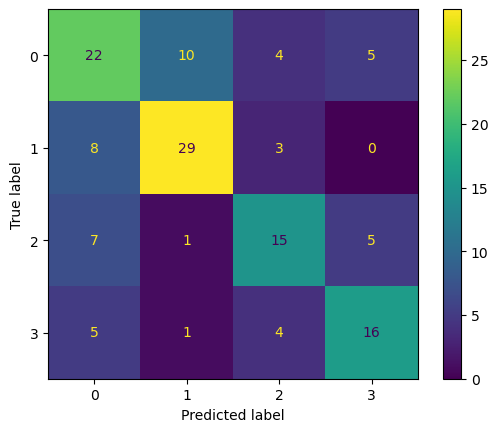

In [139]:
ConfusionMatrixDisplay(confusion_matrix(y_test_encoded,optuna_xgb_mel_preds)).plot()